# Bias and Variance evaluation in a controlled regression task
Filippo Fantinato 2041620

In the following notebook I'm showing the changes in bias and variance according to the degree $p$ of polynomial used.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [46]:
import warnings
warnings.filterwarnings("ignore")

Let's define the function to approximate: $f(x) = sin(2πx)$

In [47]:
def f(x):
  return np.sin(2*np.pi*x)

and the method which given the predicted data, the real data and the value of the standard deviation exploited to perturb the function to approximate, returns the bias, variance and train error.

Just to recall it,

$E[(y - \hat{y})^2] = bias(\hat{y})^2 + var(\hat{y}) + \sigma^2$

where:
- $E[(y - \hat{y})^2]$: the mean squared error between the predicted data and the real data;
- $bias(\hat{y})$: the bias of the predicted data, which I computed as follows $ bias(\hat{y})^2 = E[(y - \hat{y})^2] - var(\hat{y}) - \sigma^2$;
- $var(\hat{y})$: the variance of the predicted data;
- $\sigma^2$: the variance of the pertubation.

In [48]:
def get_bias_var_error(prediction, y, sigma):
  train_error = mean_squared_error(prediction, y)
  variance = np.var(prediction)
  bias = train_error - variance - (sigma)**2

  return bias, variance, train_error

In order to analyze the changes of bias and variance I define $100$ samples and perturbate them by an epsilon, that is small numbers generated by a normal with standard deviation $0.3$. Afterwards I split the dataset and compute the bias and variance on various models which exploit different degrees from 1 to 20.

In [49]:
# Number of samples
n_samples = 100
sigma = 0.3

X = np.linspace(0, 1, n_samples)[:, np.newaxis]
epsilon = np.random.normal(scale=sigma,size=n_samples)[:, np.newaxis] 
y = f(X) + epsilon

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

biases = []
variances = []
train_errors = []
test_errors = []

degrees = range(1, 21)
for degree in degrees:
  # Model with a variable polynomial degree
  model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
  
  # Training the model on the train dataset
  model.fit(X_train, y_train)
  # Predicting the train dataset
  y_train_pred = model.predict(X_train)
  # Predicting the test dataset
  y_test_pred = model.predict(X_test)
  
  # Computing the bias, variance, train and test errors
  bias, variance, train_error = get_bias_var_error(y_train_pred, y_train, sigma)
  test_error = mean_squared_error(y_test_pred, y_test)

  biases.append(bias)
  variances.append(variance)
  train_errors.append(train_error)
  test_errors.append(test_error)

Finally let me plot what I got up to now and, as I wanted to prove, increasing the degree of the polynomial the dataset is overfitted (low train erro, high test error), the bias goes to 0 and the variance increases.
That's consistent with what we've seen during the class, because with a very low degree we end up having a bias error, while with a very high degree we end up having a variance error.

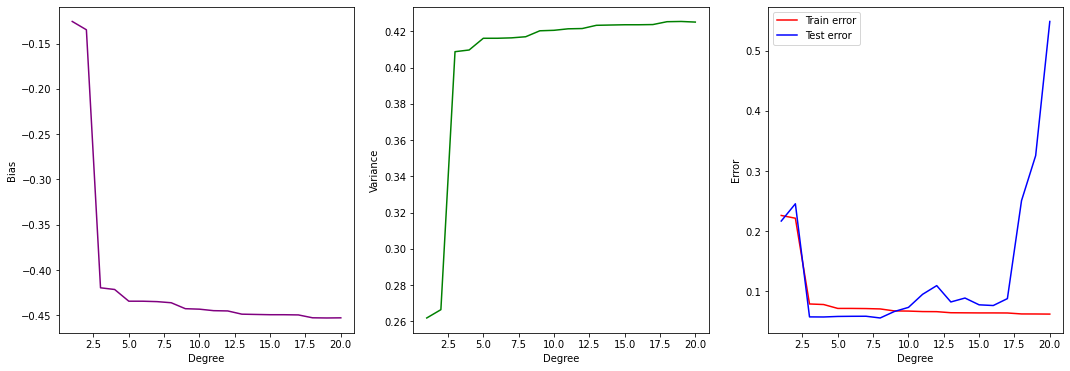

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.plot(degrees, biases, color='purple')
ax1.set_ylabel('Bias')
ax1.set_xlabel('Degree')
ax2.plot(degrees, variances, color='green')
ax2.set_ylabel('Variance')
ax2.set_xlabel('Degree')
ax3.plot(degrees, train_errors, color='red', label='Train error')
ax3.plot(degrees, test_errors, color='blue', label='Test error')
ax3.set_ylabel('Error')
ax3.set_xlabel('Degree')
ax3.legend()
plt.show()